# ***Dependencies and Models***

In [2]:
# DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

# for mounting to drive
from google.colab import drive


# Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Modeling metrics
from sklearn import metrics

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [6]:
# Mount folder to save and retrieve the outputs
drive.mount('/drive', force_remount=True)
%cd "/drive/My Drive/siraj homework"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive
/drive/My Drive/siraj homework


In [9]:
df_full = pdr.get_data_yahoo("BRK-B", start="2018-01-01").reset_index()
df_full.to_csv('output/BRK-B.csv',index=False)

[*********************100%***********************]  1 of 1 downloaded


In [10]:
df_full.shape

(433, 7)

In [11]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,198.869995,198.869995,195.960007,197.220001,197.220001,4113000
1,2018-01-03,197.000000,200.000000,197.000000,199.789993,199.789993,3526700
2,2018-01-04,200.899994,202.130005,200.009995,200.690002,200.690002,3900000
3,2018-01-05,201.000000,201.669998,199.309998,201.419998,201.419998,4207600
4,2018-01-08,201.149994,203.070007,199.800003,202.740005,202.740005,3887900


In [12]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,433.000000,433.000000,433.000000,433.000000,433.000000,4.330000e+02
mean,204.271801,205.630416,202.575081,204.101525,204.101525,4.280819e+06
std,7.801046,7.774123,7.821464,7.834384,7.834384,1.576658e+06
min,185.429993,187.619995,184.750000,184.910004,184.910004,1.929100e+06
25%,198.869995,200.289993,197.059998,198.460007,198.460007,3.269900e+06
50%,203.990005,205.220001,202.350006,203.669998,203.669998,3.964600e+06
75%,209.500000,210.929993,207.800003,209.429993,209.429993,4.776200e+06
max,224.000000,224.070007,221.300003,223.759995,223.759995,1.490770e+07


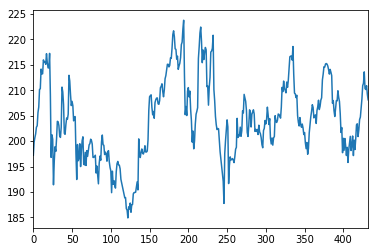

In [14]:
df_full["Adj Close"].plot()

# **Data Prepocessing**

In [0]:
df_full.set_index("Date", inplace=True)

In [16]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,198.869995,198.869995,195.960007,197.220001,197.220001,4113000
2018-01-03,197.000000,200.000000,197.000000,199.789993,199.789993,3526700
2018-01-04,200.899994,202.130005,200.009995,200.690002,200.690002,3900000
2018-01-05,201.000000,201.669998,199.309998,201.419998,201.419998,4207600
2018-01-08,201.149994,203.070007,199.800003,202.740005,202.740005,3887900


In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)

data = df_full['Adj Close'].values[indices]
x = data[:,:-1]
y = data[:,-1]

In [0]:
# split data into testing and training

split_fraction = 0.75
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [30]:
x_train.shape

(300, 32)

# **Modeling**

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)


# **Baseline**

In [0]:
y_pred_lag=np.roll(y_test,1)

In [37]:
get_performance(y_pred_lag)

Mean Absolute Error: 1.6525
Mean Squared Error: 4.5322
Root Mean Squared Error: 2.1289


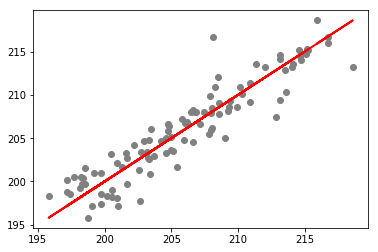

In [38]:
get_plot(y_pred_lag)

# **Linear Regression**

In [39]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [41]:
get_performance(y_pred_lr)

Mean Absolute Error: 1.5614
Mean Squared Error: 3.8584
Root Mean Squared Error: 1.9643


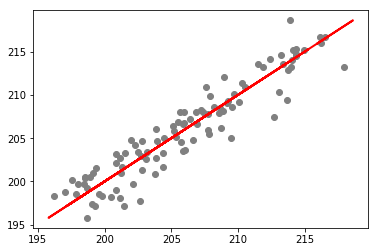

In [43]:
get_plot(y_pred_lr)

# **Method #1 - Ridge Regression**

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#gen predictions
y_pred_ridge=model_ridge.predict(x_test)

In [45]:
get_performance(y_pred_ridge)

Mean Absolute Error: 1.5612
Mean Squared Error: 3.8576
Root Mean Squared Error: 1.9641


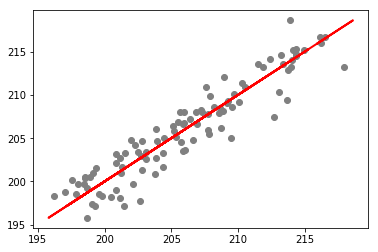

In [46]:
get_plot(y_pred_ridge)

# Method 2 - Gradient Boosting **Trees**

In [0]:
# Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [48]:
get_performance(y_pred_gb)

Mean Absolute Error: 1.6586
Mean Squared Error: 4.4792
Root Mean Squared Error: 2.1164


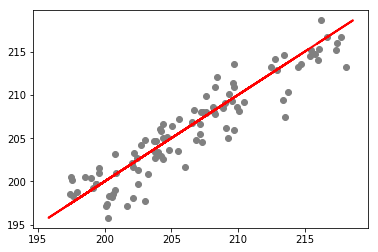

In [49]:
get_plot(y_pred_gb)

# **Method 3 - Lasso**

In [0]:
model_ls = Lasso()
model_ls.fit(x_train, y_train)

y_pred_ls = model_ls.predict(x_test)

In [53]:
get_performance(y_pred_ls)

Mean Absolute Error: 1.5681
Mean Squared Error: 3.7407
Root Mean Squared Error: 1.9341


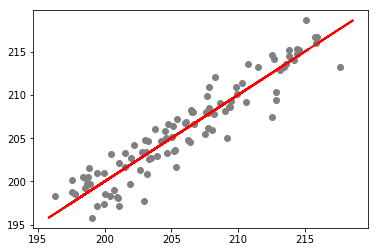

In [54]:
get_plot(y_pred_ls)

# **Comparison**

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag),
                      "lr":np.absolute(y_test-y_pred_lr),
                      "ridge":np.absolute(y_test-y_pred_ridge),
                      "gb":np.absolute(y_test-y_pred_gb),
                      "ls":np.absolute(y_test-y_pred_ls)})

(9, 20)

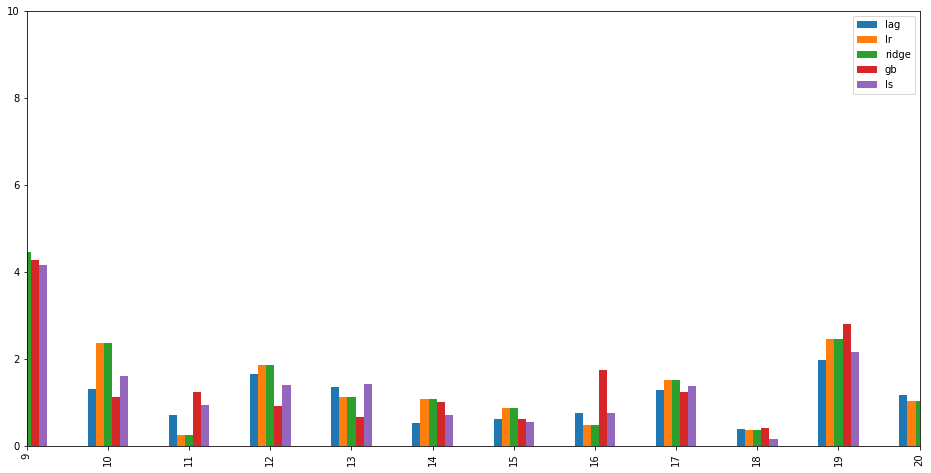

In [58]:
df_comp.plot.bar(figsize=(16, 8))
plt.ylim(0,10)
plt.xlim(9,20)

# **Conclusion**

We have made use of 5 different algorithms which differ in complexity:



*   lag (to form a baseline)
*   linear regression
*   ridge regression
*   gradient boosting trees
*   Lasso

We can see that this is a good starting point to predict prices, however, it's not even close to being reliable. Let alone put trust in these models.






